In [37]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
df = pd.read_csv('C:/USERS/YASHN/TITANIC PROJECT.CSV')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Statistical Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
# Numerical and categorical data
df_num = ['Age','SibSp','Parch','Fare']
df_cat = ['Survived','Pclass','Sex','Ticket','Cabin','Embarked']

array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

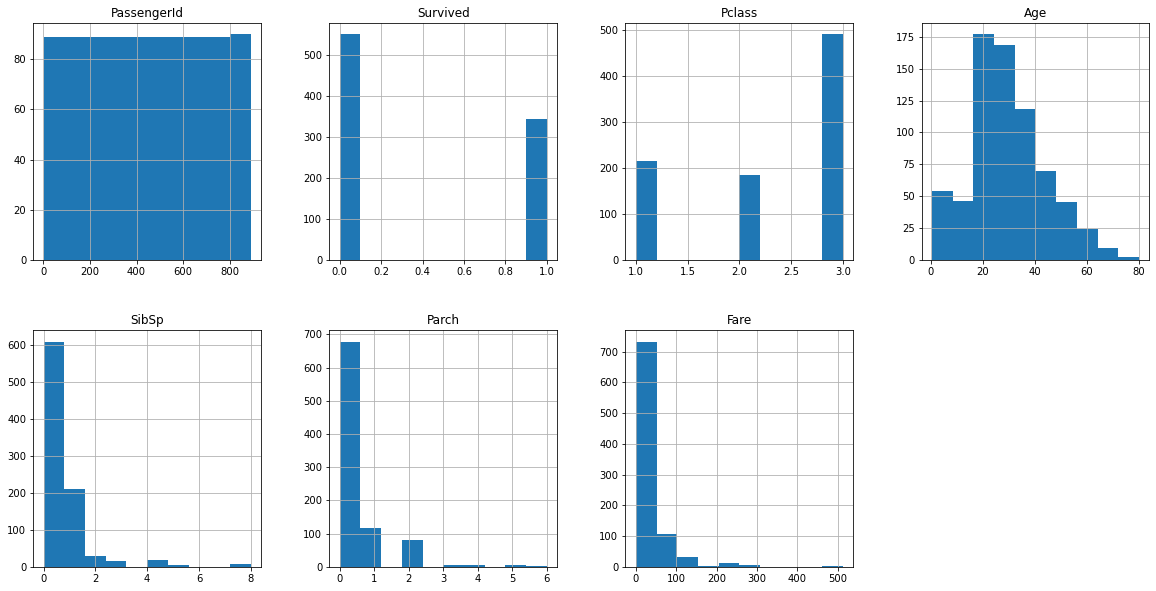

In [8]:
# Graphical distributions for all numeric variables 
# Data Visualisation
# plotting histogram
df.hist(figsize = (20,10), layout = (2,4))

In [9]:
# Checking the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

 Here, we can see that Age, Cabin and Embarked has null values

In [10]:
# Dealing with missing values
df.loc[(df['Cabin'].isnull() == False), 'Cabin'] = 1
df.loc[(df['Cabin'].isna() == True), 'Cabin'] = 0

In [13]:
df.loc[(df['Age'].isnull() == True), 'Age'] = df['Age'].mean()

In [14]:
df['Embarked'].mode()

0    S
dtype: object

In [15]:
df.loc[(df['Embarked'].isnull() == True), 'Embarked'] = 'S'

In [16]:
# Rechecking missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

We have no missing values now. But we do have some columns which doesnt seem to be relevant. So will drop thoose columns.

In [17]:
# drp columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [18]:
# Converting all columns to have numerical values
df.loc[(df['Sex'] == 'female'), 'Sex'] = 1
df.loc[(df['Sex'] == 'male'), 'Sex'] = 0

In [19]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Embarked']=LE.fit_transform(df['Embarked'])
df['Embarked'].value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [20]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,0,2
1,1,1,1,38.0,1,0,71.2833,1,0
2,1,3,1,26.0,0,0,7.9250,0,2
3,1,1,1,35.0,1,0,53.1000,1,2
4,0,3,0,35.0,0,0,8.0500,0,2


In [21]:
# Checking Correlation
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.162098
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,-0.026749,0.068230,0.039798,-0.224719,1.000000


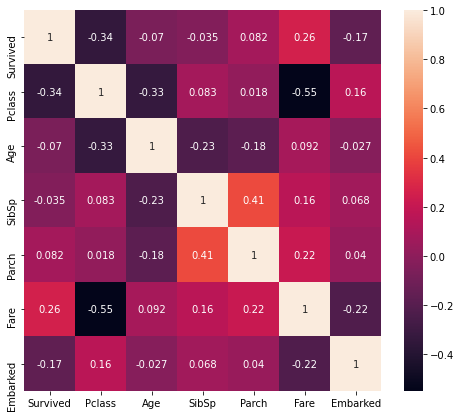

In [22]:
# Plotting Heatmap
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [23]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [24]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

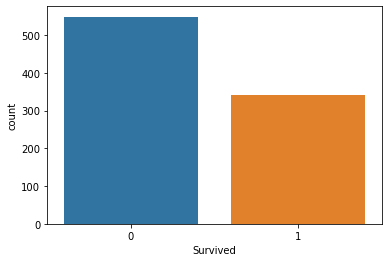

In [26]:
# visualization of survived / not survived
sns.countplot(data = df, x = 'Survived')

In [27]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [28]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [30]:
df.drop('Sex',axis =1, inplace =True)

In [10]:
# drop unnecessary features which do not affect on the prediction
drop = ['Name','Ticket','Cabin','Embarked']
df = df.drop(drop, axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [16]:
#Encoding Sex Colomn.
df['Sex Encoding'] = df['Sex'].apply(lambda x:1 if x =='male' else 0)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex Encoding
0,1,0,3,male,22.0,1,0,7.2500,1
1,2,1,1,female,38.0,1,0,71.2833,0
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,1


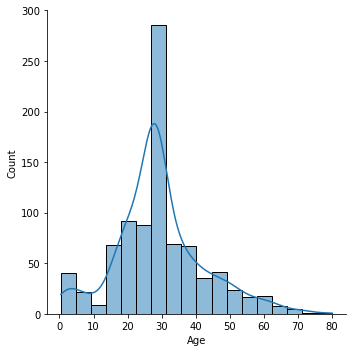

In [18]:
sns.displot(data = df , x ="Age" ,kde = True , bins=18)

In [19]:
df.drop('Sex' , axis =1 ,inplace = True)

In [20]:
# Dealing with Missing values in Age column
# data is skewed
df['Age'].fillna(df['Age'].median(),inplace = True)
df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Sex Encoding    0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Fare'>

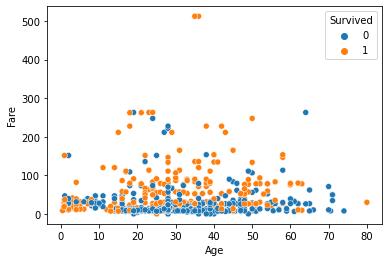

In [50]:
#Check the distribution of data.
# plotting a scatterplot
sns.scatterplot(x='Age' , y='Fare' , hue = "Survived", data = df )

in the above graph,x column is Pclass, y column is Age, the dot color is distinguished by 'Survived' column

In [21]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [22]:
df.shape

(891, 8)

In [23]:
X_train ,X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.3, stratify= y)
scaler = StandardScaler()

In [24]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
#Support Vector Machine
# search for best parameter set (C, gamma)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()

# Initiating the GridSearchCV object and run the search
param = {'C':[0.1, 1, 10], 'gamma' : [0.00001 ,0.0001 ,0.001 ,0.01 ,0.1]}
Search = GridSearchCV(svm, param)
Search.fit(scaled_X_train,y_train)

#Report the best parameters and the corresponding score 
print('Best CV params', Search.best_params_)
print('Best CV Accuracy',Search.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", Search.score(scaled_X_test, y_test))

Best CV params {'C': 1, 'gamma': 0.1}
Best CV Accuracy 0.8106193548387098
Test accuracy of best grid search hypers: 0.8470149253731343


In [40]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       165
           1       0.82      0.77      0.79       103

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268

[[148  17]
 [ 24  79]]


In [26]:
# Decision Tree Classifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

DTree = DecisionTreeClassifier(max_depth=10 , random_state=1)
DTree.fit(scaled_X_train,y_train)
y_preds = DTree.predict(scaled_X_test)
print(accuracy_score(y_test,y_preds))

0.8283582089552238


In [39]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       165
           1       0.82      0.77      0.79       103

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268

[[148  17]
 [ 24  79]]


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN

# Ensemble learnign
SEED = 1
lr = LogisticRegression(random_state = SEED)
knn = KNN(n_neighbors = 27)
DTree = DecisionTreeClassifier(max_depth = 18 ,criterion ='entropy',random_state=1)

# Define the list classifiers

classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', DTree)]

In [29]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex Encoding
193,194,2,3.0,1,1,26.0000,1
324,325,3,28.0,8,2,69.5500,1
169,170,3,28.0,0,0,56.4958,1
2,3,3,26.0,0,0,7.9250,0
102,103,1,21.0,0,1,77.2875,1


In [30]:
X_train_DR = X_train.drop(['PassengerId'], axis=1)
X_test_DR = X_test.copy()
X_test_DR = X_test_DR.drop(['PassengerId'], axis=1)
for clf_name, clf in classifiers:    
 
    # Fit clf to the training set
    clf.fit(X_train_DR, y_train)    
   
    # Predict y_pred
    y_pred = clf.predict(X_test_DR)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
   
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

Logistic Regression : 0.813
K Nearest Neighbours : 0.724
Classification Tree : 0.780


In [41]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       165
           1       0.82      0.77      0.79       103

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268

[[148  17]
 [ 24  79]]


In [45]:
#Using Bagging classification
from sklearn.ensemble import BaggingClassifier

# Instantiate Decision tree.
DTree = DecisionTreeClassifier(random_state=1)

# Instantiate bc
BC = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)
# Fit bc to the training set
BC.fit(X_train_DR, y_train)

# Predict test set labels
y_pred = BC.predict(X_test_DR)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of BC: {:.6f}'.format(acc_test)) 

Test set accuracy of BC: 0.847015


In [46]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       165
           1       0.82      0.77      0.79       103

    accuracy                           0.85       268
   macro avg       0.84      0.83      0.84       268
weighted avg       0.85      0.85      0.85       268

[[148  17]
 [ 24  79]]


We are getting 84% accuracy by using Bagging classifier and SVM model

In [49]:
# Model Saving
import pickle
file = 'Sales Channel.pkl'
#save file
save = pickle.dump(svm,open(file,'wb'))